In [1]:
# подключаем библиотеку
%run libs/pump_unit.ipynb

In [2]:
# файлы с характеристиками насосов
files = ['data/pump.csv',
         'data/pump.csv',
         'data/pump.csv',
         'data/pump.csv']

In [3]:
# шаг изменения параметров при рассчете
flow_step=10.0
head_step=0.2

In [4]:
# первый подъём
pb_1 = PumpBattery(flow_step, head_step, files)
pb_1.calc_units_matrices()

# второй подъём
pb_2 = PumpBattery(flow_step, head_step, files)
pb_2.calc_units_matrices()

In [5]:
# посчитаем один из вариантов работы
scenario = 0
pb_1.calc_mutation_matrix(scenario)
pb_2.calc_mutation_matrix(scenario)

In [6]:
# работа с данными из файлов

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
#sns.set_palette("bright")

# Use palplot and pass in the variable:
#sns.palplot(palette)

In [8]:
# конвертер величин

def convert_unit(kind, value, unit_in, unit_out):
    unit = {
        'head': {'m':1.0, 'kgf_cm2':10.0, 'bar':10.197, 'kPa':0.10197, 'atm':10.33, 'psi':0.70307},
        'flow': {'cbmh':1.0, 'cbms':3600.0, 'lpm':0.06, 'lps':3.6},
        'power': {'kW':1.0, 'W':0.001}
    }
    return value * unit[kind][unit_in] / unit[kind][unit_out]

In [9]:
# читаем показания

log_1 = pd.read_csv('data/log_06_04_2019.csv', sep=';', decimal=',')
log_1["date"] = pd.to_datetime(log_1["date"], format="%d.%m.%Y %H:%M")
log_1.fillna(method ='ffill', inplace=True)

log_2 = pd.read_csv('data/log_21_04_2019.csv', sep=';', decimal=',')
log_2["date"] = pd.to_datetime(log_2["date"], format="%d.%m.%Y %H:%M")
log_2.fillna(method ='ffill', inplace=True)

In [10]:
# объединяем 2 набора данных для обработки

frames = [log_1, log_2]
log = pd.concat(frames, ignore_index=True)

num = log_1.shape[0]

In [11]:
# преобразуем показания давления

head_raw_cols = ['head in', 'head out', 'head in lift 1', 'head out lift 1', 'head in lift 2', 'head out lift 2']
for col in head_raw_cols:
    log[col] = log[col].apply(lambda x: convert_unit('head', x, 'bar', 'm'))

In [12]:
# окно для усреднения

win = 3

In [13]:
# усредним показания давления

head_cols = ['MA head in', 'MA head out', 'MA head in lift 1', 'MA head out lift 1', 
             'MA head in lift 2', 'MA head out lift 2']

log = log.reindex(columns=log.columns.to_list() + head_cols).fillna(0)
#log = log.reindex(columns=set(log.columns.to_list() + head_cols)).fillna(0)

for col_raw, col in zip(head_raw_cols, head_cols):
    log[:num][col] = log[:num][col_raw].rolling(window=win).mean()
    log[num:][col] = log[num:][col_raw].rolling(window=win).mean()

log.fillna(method='bfill', inplace=True)

C:\Users\yushanov\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\yushanov\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [14]:
# усредним частоту

freq_raw_cols = ['freq unit 1', 'freq unit 2', 'freq unit 3', 'freq unit 3.1', 
                 'freq unit 4', 'freq unit 5', 'freq unit 6', 'freq unit 6.1']

freq_cols = ['MA freq unit 1', 'MA freq unit 2', 'MA freq unit 3', 'MA freq unit 3.1', 
             'MA freq unit 4', 'MA freq unit 5', 'MA freq unit 6', 'MA freq unit 6.1']
freq_cols_1 = freq_cols[:4]
freq_cols_2 = freq_cols[4:]


log = log.reindex(columns=log.columns.to_list() + freq_cols).fillna(0)
#log = log.reindex(columns=set(log.columns.to_list() + head_cols)).fillna(0)

for col_raw, col in zip(freq_raw_cols, freq_cols):
    log[:num][col] = log[:num][col_raw].rolling(window=win).mean()
    log[num:][col] = log[num:][col_raw].rolling(window=win).mean()

log.fillna(method='bfill', inplace=True)

C:\Users\yushanov\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\yushanov\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Вспомогательные переменные

In [15]:
speed_cols = ['speed unit 1', 'speed unit 2', 'speed unit 3', 'speed unit 3.1',
              'speed unit 4', 'speed unit 5', 'speed unit 6', 'speed unit 6.1']
speed_cols_1 = speed_cols[:4]
speed_cols_2 = speed_cols[4:]

In [16]:
power_sup_cols = ['power sup. unit 1', 'power sup. unit 2', 'power sup. unit 3', 'power sup. unit 3.1',
                  'power sup. unit 4', 'power sup. unit 5', 'power sup. unit 6', 'power sup. unit 6.1']
power_sup_cols_1 = power_sup_cols[:4]
power_sup_cols_2 = power_sup_cols[4:]

In [17]:
power_hydro_cols = ['power hydro unit 1', 'power hydro unit 2', 'power hydro unit 3', 'power hydro unit 3.1',
                    'power hydro unit 4', 'power hydro unit 5', 'power hydro unit 6', 'power hydro unit 6.1']
power_hydro_cols_1 = power_hydro_cols[:4]
power_hydro_cols_2 = power_hydro_cols[4:]

In [18]:
flow_cols = ['flow unit 1', 'flow unit 2', 'flow unit 3', 'flow unit 3.1',
             'flow unit 4', 'flow unit 5', 'flow unit 6', 'flow unit 6.1']
flow_cols_1 = flow_cols[:4]
flow_cols_2 = flow_cols[4:]

In [19]:
power_rate_cols = ['power rate unit 1', 'power rate unit 2', 'power rate unit 3', 'power rate unit 3.1',
                   'power rate unit 4', 'power rate unit 5', 'power rate unit 6', 'power rate unit 6.1']
power_rate_cols_1 = power_rate_cols[:4]
power_rate_cols_2 = power_rate_cols[4:]

In [20]:
eff_actual_cols = ['eff actual unit 1', 'eff actual unit 2', 'eff actual unit 3', 'eff actual unit 3.1',
                   'eff actual unit 4', 'eff actual unit 5', 'eff actual unit 6', 'eff actual unit 6.1']
eff_actual_cols_1 = eff_actual_cols[:4]
eff_actual_cols_2 = eff_actual_cols[4:]

In [21]:
head_labels = ['Вход в котельную', 'Выход из котельной', 'Всас подъём 1', 'Нагнетание подъём 1',
               'Всас подъём 2', 'Нагнетание подъём 2']

In [22]:
lift_labels = ['Подъём 1', 'Подъём 2']

In [23]:
pump_labels = ['Насос 1', 'Насос 2', 'Насос 3', 'Насос 3.1', 'Насос 4', 'Насос 5', 'Насос 6', 'Насос 6.1']

In [24]:
fact_opt_labels = ['Фактический (подъём 1)', 'Фактический (подъём 2)', 
                   'Оптимальный (подъём 1)', 'Оптимальный (подъём 2)']

In [25]:
head_adj_cols = ['head in adj', 'head out adj', 'head in adj lift 1', 'head out adj lift 1', 
                 'head in adj lift 2', 'head out adj lift 2']

#### Вспомогательные функции

In [26]:
def plot_by_date(ncols, dfs, cols, labels, title, y_label):
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 5))
    for ncol in range(ncols):
        ax = axes[ncol] if ncols > 1 else axes
        dfs[ncol].plot('date', cols, title=title, ax=ax, label=labels)
        ax.set_ylabel(y_label)
        ax.legend(loc='upper right')
    plt.show()

In [27]:
def plot_dist_kde(data, ax, color):
    sns.distplot(data, ax=ax, kde=False, color=color)
    second_ax = ax.twinx()
    sns.distplot(data, ax=second_ax, kde=True, hist=False, color=color)
    second_ax.set_yticks([])

In [28]:
def plot_dists(ncols, dfs, cols, labels, title, x_label, y_label, xlim=None, ylim=None):
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 5))
    for ncol in range(ncols):
        ax = axes[ncol] if ncols > 1 else axes
        for col in cols:
            sns.distplot(dfs[ncol][col], ax=ax)
        ax.set_title(title[ncol])
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xlim(0, xlim)
        yl = ylim[ncol] if (ncols > 1 and ylim != None) else ylim
        ax.set_ylim(0, yl)
        ax.legend(labels)

In [29]:
def plot_scatter(df, cols, labels, colors, markers, title, x_label, y_label):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    for idx, (col, label) in enumerate(zip(cols, labels)):
        df.plot.scatter(col[0], col[1], color=colors[idx], marker=markers[idx], s=50, ax=axes, label=label)
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_xlim(0, None)
    axes.set_ylim(0, None)
    plt.show()

In [30]:
def plot_flow_head(ncols, dfs, cols, labels, colors, titles, x_label, y_label, xlim=None, ylim=None):
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 5))
    for ncol in range(ncols):
        ax = axes[ncol] if ncols > 1 else axes        
        for idx, col in enumerate(cols):
            dfs[ncol].plot.scatter(col[0], col[1], color=colors[idx], s=50, ax=ax, label=labels[idx])
        ax.set_title(titles[ncol])
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xlim(0, xlim)
        ax.set_ylim(0, ylim)
    plt.show()

In [31]:
# косвенный поиск расхода каждого насоса через напор и частоту

def get_flow_by_head_speed(unit, head, speed):
    unit.pump.set_speed(speed)
    head_lim = head.copy()
    head_lim[head_lim > unit.pump.head_max] = unit.pump.head_max
    data = quadratic_equation_root(unit.pump.head_c[2], 
                                   unit.pump.head_c[1]*speed, 
                                   head_lim - (unit.pump.head_c[0] * speed**2))
    return pd.Series(data, index=head.index)

In [32]:
# поиск индекса элемента в массиве по значению

def find_index(array, value):
    return (np.abs(np.asarray(array) - value)).argmin()

# поиск ближайшего значения из массива

def find_quant(array, value):
    return array[find_index(array, value)]

#### Расчёты

In [33]:
# корректировка на высоту установки датчиков

head_in_height = 2.0
head_out_height = 2.0

head_in_N_height = 3.1
head_out_N_height = 3.8

log['head in adj'] = log['MA head in'] - head_in_height
log['head out adj'] = log['MA head out'] - head_out_height
log[['head in adj lift 1', 'head in adj lift 2']] = log[['MA head in lift 1', 'MA head in lift 2']] - head_in_N_height
log[['head out adj lift 1', 'head out adj lift 2']] = log[['MA head out lift 1', 'MA head out lift 2']] - head_out_N_height

In [34]:
# напор, сорректированный на высоту установки датчиков

log['head lift 1'] = log['head out adj lift 1'] - log['head in adj lift 1']
log['head lift 2'] = log['head out adj lift 2'] - log['head in adj lift 2']

In [35]:
# считаем относительную скорость, нормируем на максимальную частоту

log['speed unit 1'], log['speed unit 2'], log['speed unit 3'], log['speed unit 3.1'] = 0, 0, 0, 0
log['speed unit 4'], log['speed unit 5'], log['speed unit 6'], log['speed unit 6.1'] = 0, 0, 0, 0

#log = log.reindex(columns=log.columns.to_list() + speed_cols).fillna(0)

for freq, speed in zip(freq_cols, speed_cols):
    log[speed] = log[freq] / 50.0

In [36]:
# суммарная мощность насосов

log['power sup. lift 1'] = log[power_sup_cols_1].sum(axis=1)
log['power sup. lift 2'] = log[power_sup_cols_2].sum(axis=1)

In [37]:
# косвенный поиск расхода каждого насоса через напор и частоту

log['flow unit 1'], log['flow unit 2'], log['flow unit 3'], log['flow unit 3.1'] = 0, 0, 0, 0
log['flow unit 4'], log['flow unit 5'], log['flow unit 6'], log['flow unit 6.1'] = 0, 0, 0, 0

#log = log.reindex(columns=log.columns.to_list() + flow_cols).fillna(0)

for idx, (flow, speed) in enumerate(zip(flow_cols_1, speed_cols_1)):
    log[flow] = get_flow_by_head_speed(pb_1.units[idx], log['head lift 1'], log[speed])

for idx, (flow, speed) in enumerate(zip(flow_cols_2, speed_cols_2)):
    log[flow] = get_flow_by_head_speed(pb_2.units[idx], log['head lift 2'], log[speed])

In [38]:
# суммарный расход насосов

log['flow lift 1'] = log[flow_cols_1].sum(axis=1)
log['flow lift 2'] = log[flow_cols_2].sum(axis=1)

In [39]:
# расчёт гидравлической мощности

log['power hydro unit 1'], log['power hydro unit 2'], log['power hydro unit 3'], log['power hydro unit 3.1'] = 0, 0, 0, 0
log['power hydro unit 4'], log['power hydro unit 5'], log['power hydro unit 6'], log['power hydro unit 6.1'] = 0, 0, 0, 0

#log = log.reindex(columns=log.columns.to_list() + power_hydro_cols).fillna(0)

log[power_hydro_cols] = 998.0 * 9.81 * log[flow_cols] / 3600.0 / 1000.0

log[power_hydro_cols_1] = log[power_hydro_cols_1].mul(log['head lift 1'], axis=0)
log[power_hydro_cols_2] = log[power_hydro_cols_2].mul(log['head lift 2'], axis=0)

In [71]:
# суммарная гидравлическая мощность насосов

log['power hydro lift 1'] = log[power_hydro_cols_1].sum(axis=1)
log['power hydro lift 2'] = log[power_hydro_cols_2].sum(axis=1)

log[:num]['power hydro lift 2'] = 998.0 * 9.81 * log[:num]['flow'].mul(log[:num]['head lift 2'], axis=0) / 3600.0 / 1000.0

C:\Users\yushanov\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
log['power hydro lift 2']

0     72.115683
1     72.115683
2     74.147111
3     74.147111
4     76.178539
5     76.178539
6     80.241394
7     80.241394
8     81.257108
9     81.257108
10    76.178539
11    76.178539
12    66.021400
13    66.021400
14    71.099970
15    80.241394
16    71.099970
17    71.099970
18    76.178539
19    76.178539
20    80.749251
21    80.749251
22    78.209967
23    78.209967
24    58.370199
25    58.370199
26    58.370199
27    55.767520
28    55.767520
29    54.679627
        ...    
38    60.211747
39    60.232246
40    58.798212
41    57.479833
42    58.137823
43    61.559173
44    61.559173
45    59.435181
46    55.935554
47    54.796559
48    54.796559
49    50.840132
50    48.211815
51    45.610273
52    45.500969
53    45.500969
54    46.870937
55    48.211815
56    52.083583
57    54.692021
58    58.576072
59    61.010244
60    58.370199
61    53.330348
62    45.500969
63    41.184701
64    39.663559
65    39.663559
66    44.098986
67    48.211815
Name: power hydro lift 2

In [73]:
998.0 * 9.81 * log[:num]['flow'].mul(log[:num]['head lift 2'], axis=0) / 3600.0 / 1000.0

0     72.115683
1     72.115683
2     74.147111
3     74.147111
4     76.178539
5     76.178539
6     80.241394
7     80.241394
8     81.257108
9     81.257108
10    76.178539
11    76.178539
12    66.021400
13    66.021400
14    71.099970
15    80.241394
16    71.099970
17    71.099970
18    76.178539
19    76.178539
20    80.749251
21    80.749251
22    78.209967
23    78.209967
dtype: float64

In [41]:
# расчёт удельного расхода электроэнергии

log['power rate lift 1'] = log['power sup. lift 1'] / log['flow lift 1']
log['power rate lift 2'] = log['power sup. lift 2'] / log['flow lift 2']

In [74]:
# расчёт КПД

log['eff actual lift 1'] = log['power hydro lift 1'] / log['power sup. lift 1'] * 100.0
log['eff actual lift 2'] = log['power hydro lift 2'] / log['power sup. lift 2'] * 100.0

In [43]:
# квантование напора по уровням с заданным шагом

log['head idx lift 1'] = log['head lift 1'].apply(lambda x: find_index(pb_1.head_points, x))
log['head idx lift 2'] = log['head lift 2'].apply(lambda x: find_index(pb_2.head_points, x))

log['head quant lift 1'] = pb_1.head_points[log['head idx lift 1']]
log['head quant lift 2'] = pb_2.head_points[log['head idx lift 2']]

In [44]:
# квантование расхода по уровням с заданным шагом

log['flow idx lift 1'] = log['flow lift 1'].apply(lambda x: find_index(pb_1.flow_points, x))
log['flow idx lift 2'] = log['flow lift 2'].apply(lambda x: find_index(pb_2.flow_points, x))

log['flow quant lift 1'] = pb_1.flow_points[log['flow idx lift 1']]
log['flow quant lift 2'] = pb_2.flow_points[log['flow idx lift 2']]

In [45]:
# рекомендуемое количество насосов для рассматриваемых режимов работы станции

log['count opt. lift 1'] = [pb_1.count_total_matrix[scenario]
                                                  [log['head idx lift 1'][x]]
                                                  [log['flow idx lift 1'][x]] for x in range(log['head idx lift 1'].shape[0])]

log['count opt. lift 2'] = [pb_2.count_total_matrix[scenario]
                                                  [log['head idx lift 2'][x]]
                                                  [log['flow idx lift 2'][x]] for x in range(log['head idx lift 2'].shape[0])]

In [46]:
# наилучшее КПД для рассматриваемых режимов работы станции

log['eff opt. lift 1'] = [pb_1.eff_total_matrix[scenario]
                                              [log['head idx lift 1'][x]]
                                              [log['flow idx lift 1'][x]] for x in range(log['head idx lift 1'].shape[0])]

log['eff opt. lift 2'] = [pb_2.eff_total_matrix[scenario]
                                              [log['head idx lift 2'][x]]
                                              [log['flow idx lift 2'][x]] for x in range(log['head idx lift 2'].shape[0])]

In [47]:
# оптимальное энергопотребление

log['power sup. opt. lift 1'] = log['power hydro lift 1'] / log['eff opt. lift 1'] * 100.0
log['power sup. opt. lift 2'] = log['power hydro lift 2'] / log['eff opt. lift 2'] * 100.0

In [48]:
# считаем фактическое и оптимальное количество электроэнергии за период наблюдения

pb_1.energy_1 = log[:num]['power sup. lift 1'].sum()
pb_2.energy_1 = log[:num]['power sup. lift 2'].sum()
pb_1.energy_opt_1 = log[:num]['power sup. opt. lift 1'].sum()
pb_2.energy_opt_1 = log[:num]['power sup. opt. lift 2'].sum()

pb_1.energy_2 = log[num:]['power sup. lift 1'].sum()
pb_2.energy_2 = log[num:]['power sup. lift 2'].sum()
pb_1.energy_opt_2 = log[num:]['power sup. opt. lift 1'].sum()
pb_2.energy_opt_2 = log[num:]['power sup. opt. lift 2'].sum()

# Если оптимальный режим хуже факта, то оптимальный режим = факту
if pb_2.energy_opt_2 > pb_2.energy_2:
    pb_2.energy_opt_2 = pb_2.energy_2

In [49]:
# расчёт удельного расхода электроэнергии

log['power rate opt. lift 1'] = log['power sup. opt. lift 1'] / log['flow lift 1']
log['power rate opt. lift 2'] = log['power sup. opt. lift 2'] / log['flow lift 2']

#### Графики

##### Характеристики насосов

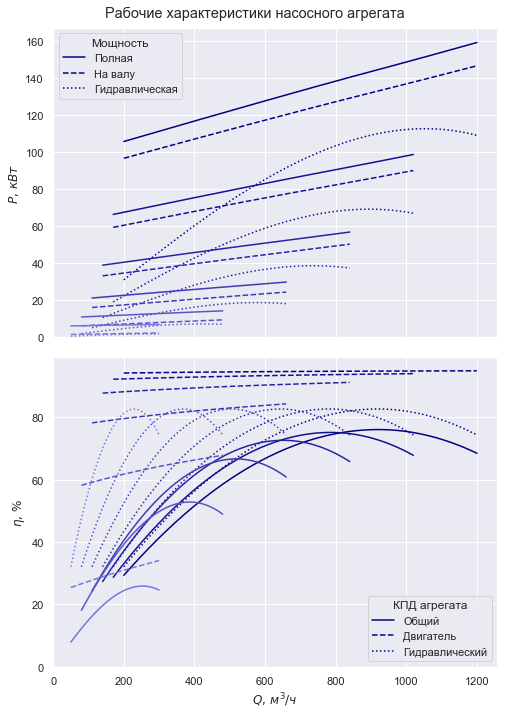

In [50]:
pb_1.units[0].plot_work_curves()

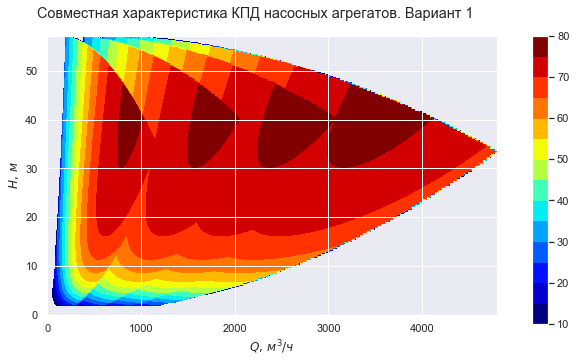

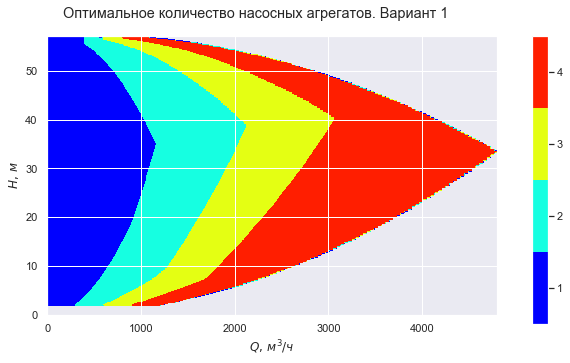

In [51]:
# посмотрим на результат
pb_1.plot_eff_total_map(scenario)
pb_1.plot_count_total_map(scenario)

##### Напор

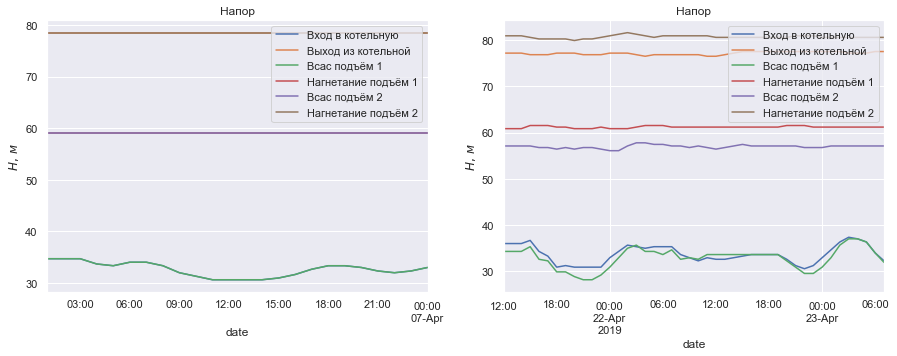

In [52]:
plot_by_date(2, [log[:num], log[num:]], head_cols, head_labels, 'Напор', '$H,\, м$')

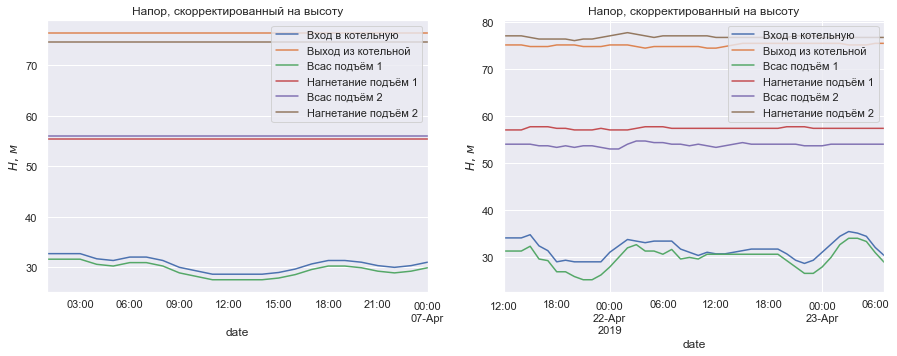

In [53]:
plot_by_date(2, [log[:num], log[num:]], head_adj_cols, head_labels, 'Напор, скорректированный на высоту', '$H,\, м$')

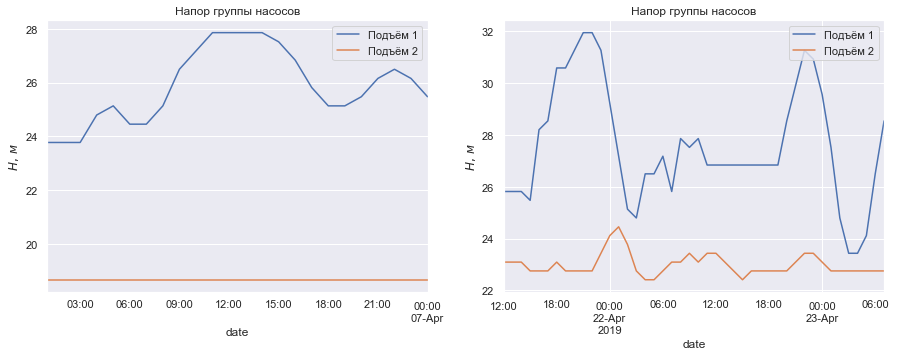

In [54]:
plot_by_date(2, [log[:num], log[num:]], ['head lift 1', 'head lift 2'], lift_labels, 'Напор группы насосов', '$H,\, м$')

##### Частота

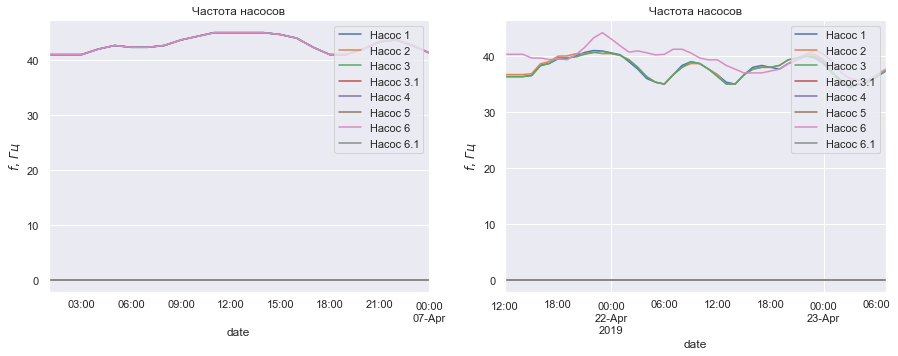

In [55]:
plot_by_date(2, [log[:num], log[num:]], freq_cols, pump_labels, 'Частота насосов', '$f,\, Гц$')

##### Расход

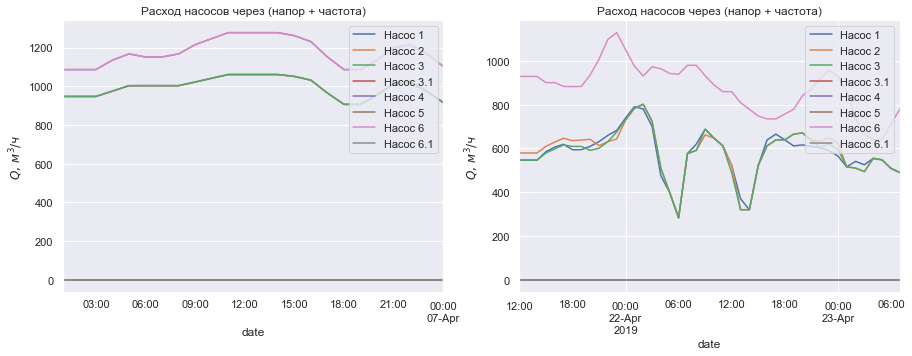

In [56]:
plot_by_date(2, [log[:num], log[num:]], flow_cols, pump_labels, 'Расход насосов через (напор + частота)', '$Q,\, м^3/ч$')

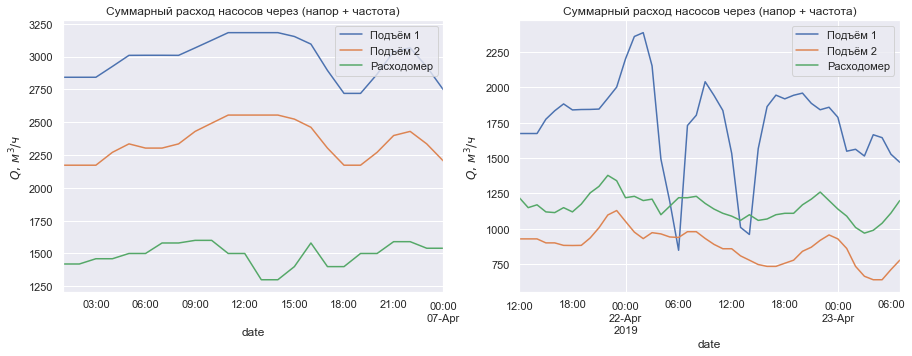

In [57]:
plot_by_date(2, [log[:num], log[num:]], ['flow lift 1', 'flow lift 2', 'flow'], lift_labels + ['Расходомер'], 
             'Суммарный расход насосов через (напор + частота)', '$Q,\, м^3/ч$')

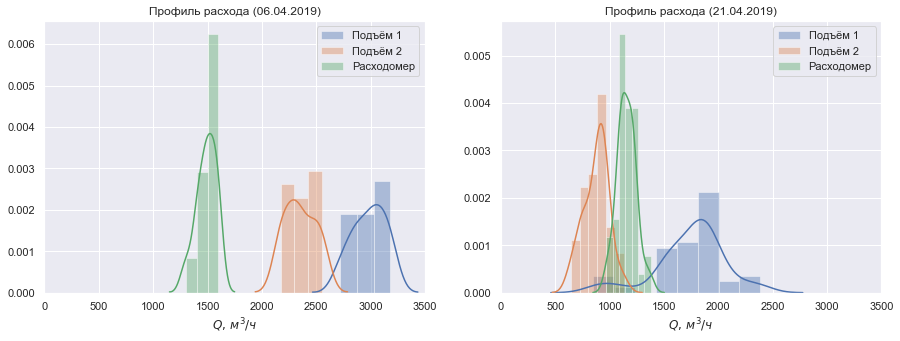

In [58]:
plot_dists(2, [log[:num], log[num:]], ['flow lift 1', 'flow lift 2', 'flow'], lift_labels + ['Расходомер'],
           ['Профиль расхода (06.04.2019)', 'Профиль расхода (21.04.2019)'], '$Q,\, м^3/ч$', '', xlim=3500)

##### Рабочие точки станции

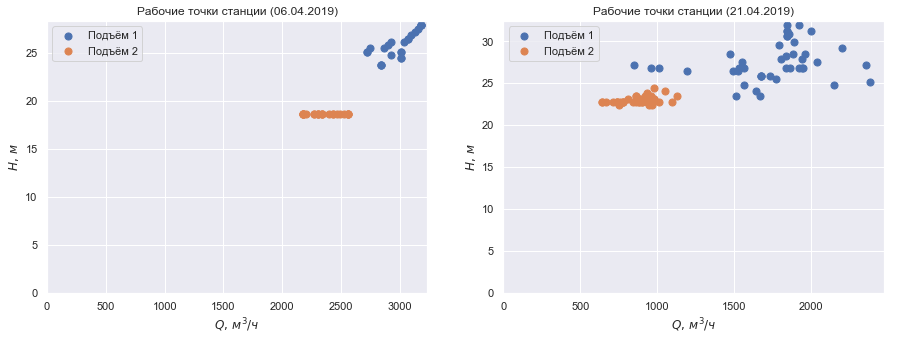

In [59]:
plot_flow_head(2, [log[:num], log[num:]], [['flow lift 1', 'head lift 1'], ['flow lift 2', 'head lift 2']], lift_labels, 
               ['C0', 'C1'], ['Рабочие точки станции (06.04.2019)', 'Рабочие точки станции (21.04.2019)'],
               '$Q,\, м^3/ч$', '$H,\, м$')

##### Потребляемая мощность

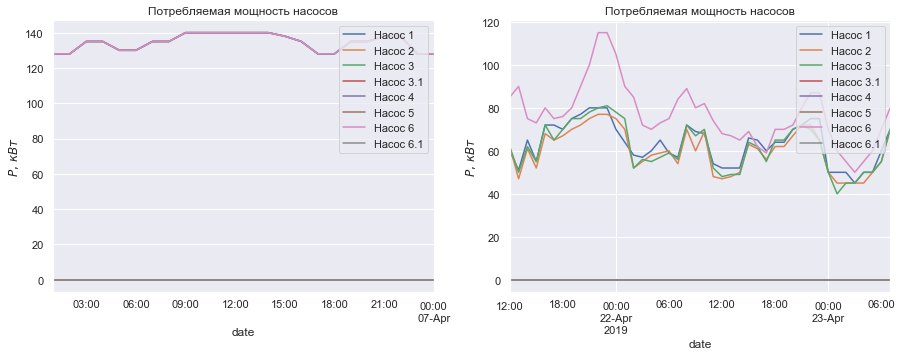

In [60]:
plot_by_date(2, [log[:num], log[num:]], power_sup_cols, pump_labels, 'Потребляемая мощность насосов', '$P,\, кВт$')

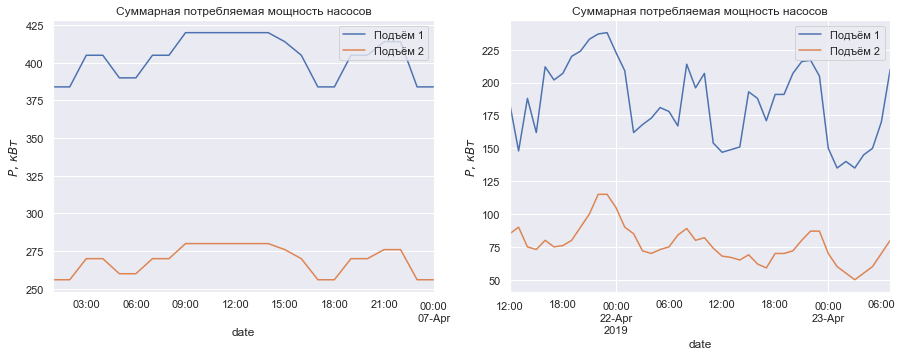

In [61]:
plot_by_date(2, [log[:num], log[num:]], ['power sup. lift 1', 'power sup. lift 2'], lift_labels, 
             'Суммарная потребляемая мощность насосов', '$P,\, кВт$')

##### Гидравлическая мощность

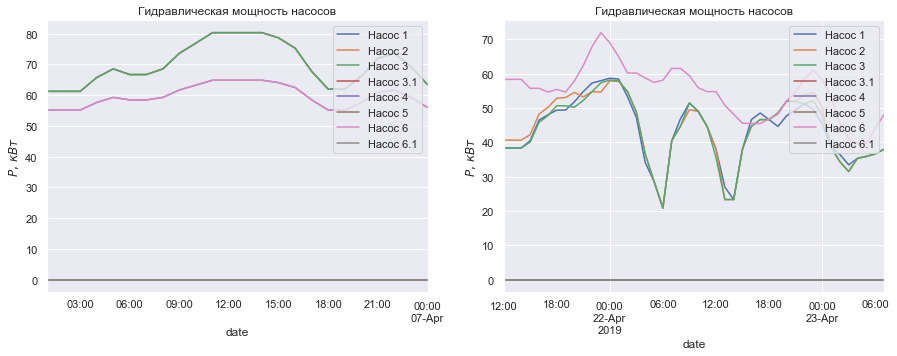

In [62]:
plot_by_date(2, [log[:num], log[num:]], power_hydro_cols, pump_labels, 'Гидравлическая мощность насосов', '$P,\, кВт$')

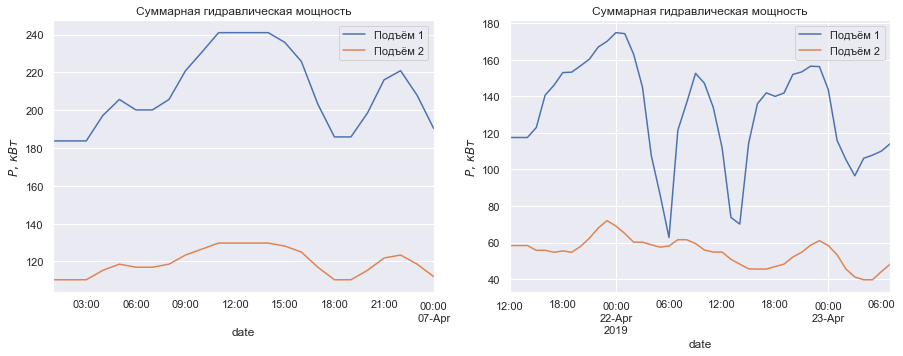

In [63]:
plot_by_date(2, [log[:num], log[num:]], ['power hydro lift 1', 'power hydro lift 2'], lift_labels, 
             'Суммарная гидравлическая мощность', '$P,\, кВт$')

##### КПД

In [76]:
# Если КПД выше 96%, то КПД = 96%

log['eff actual lift 1'] = log['eff actual lift 1'].apply(lambda x: 96 if x > 96 else x)

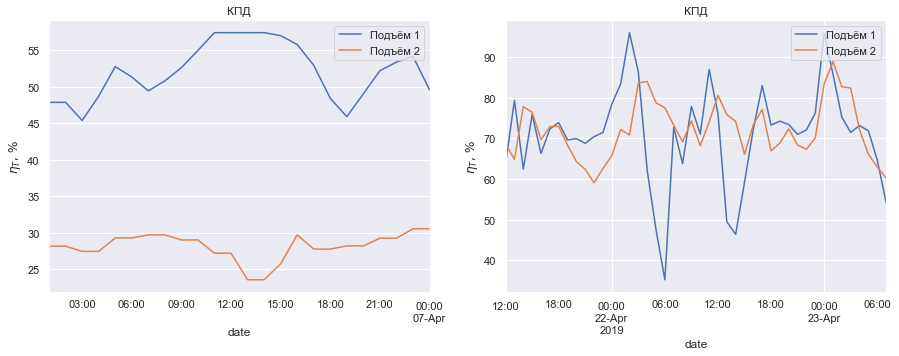

In [77]:
plot_by_date(2, [log[:num], log[num:]], ['eff actual lift 1', 'eff actual lift 2'], lift_labels, 'КПД', '$\eta_T,\, \%$')

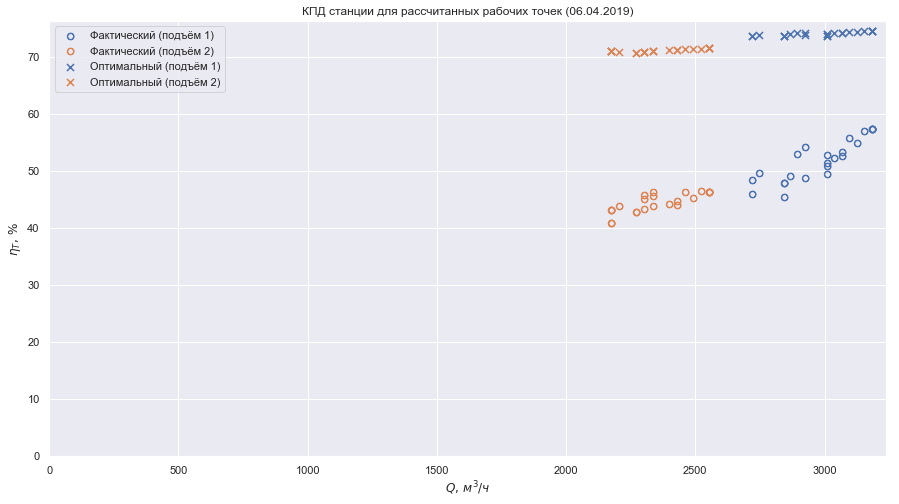

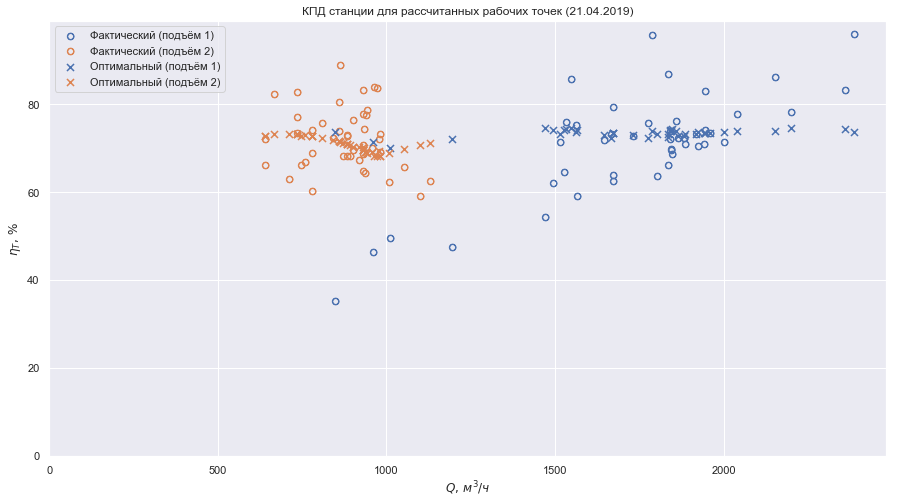

In [66]:
cols = [['flow lift 1', 'eff actual lift 1'], ['flow lift 2', 'eff actual lift 2'],
        ['flow lift 1', 'eff opt. lift 1'], ['flow lift 2', 'eff opt. lift 2']]

plot_scatter(log[:num], cols, fact_opt_labels, ['C0', 'C1', 'C0', 'C1'], ['$\u25EF$', '$\u25EF$', 'x', 'x'], 
             'КПД станции для рассчитанных рабочих точек (06.04.2019)', '$Q,\, м^3/ч$', '$\eta_T,\, \%$')

plot_scatter(log[num:], cols, fact_opt_labels, ['C0', 'C1', 'C0', 'C1'], ['$\u25EF$', '$\u25EF$', 'x', 'x'], 
             'КПД станции для рассчитанных рабочих точек (21.04.2019)', '$Q,\, м^3/ч$', '$\eta_T,\, \%$')

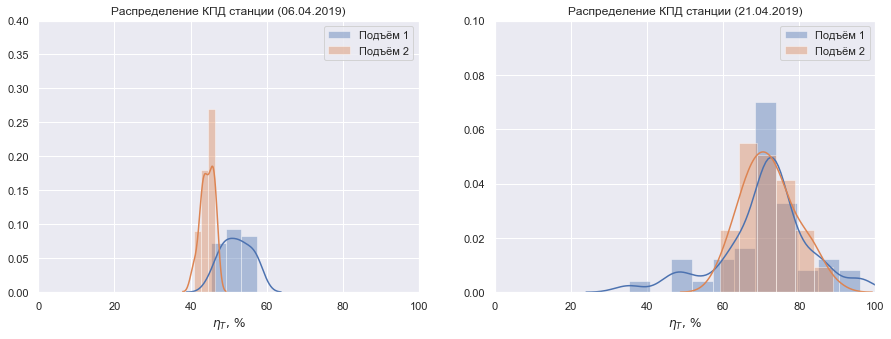

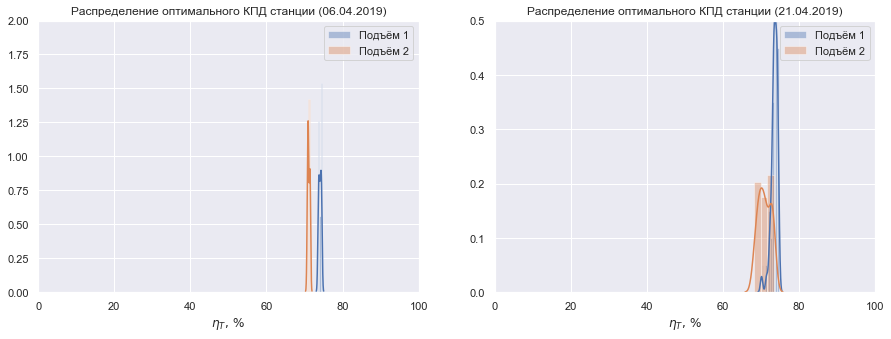

In [67]:
plot_dists(2, [log[:num], log[num:]], ['eff actual lift 1', 'eff actual lift 2'], lift_labels,
           ['Распределение КПД станции (06.04.2019)', 'Распределение КПД станции (21.04.2019)'], 
           '$\eta_T,\, \%$', '', xlim=100, ylim=[0.4, 0.1])
plot_dists(2, [log[:num], log[num:]], ['eff opt. lift 1', 'eff opt. lift 2'], lift_labels,
           ['Распределение оптимального КПД станции (06.04.2019)', 'Распределение оптимального КПД станции (21.04.2019)'], 
           '$\eta_T,\, \%$', '', xlim=100, ylim=[2, 0.5])

##### Удельный расход электроэнергии

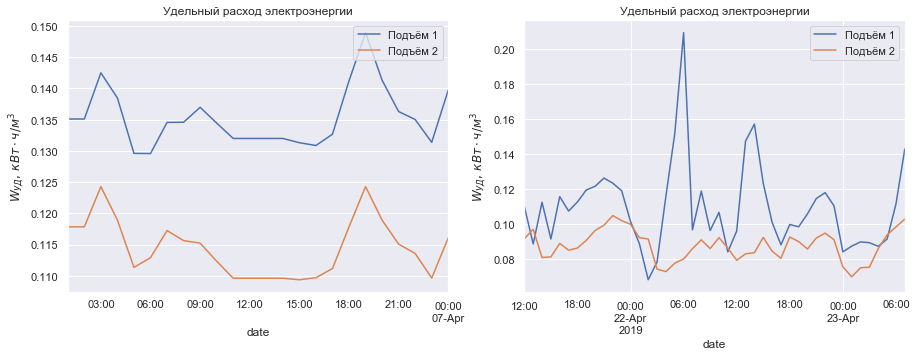

In [68]:
plot_by_date(2, [log[:num], log[num:]], ['power rate lift 1', 'power rate lift 2'], lift_labels,
             'Удельный расход электроэнергии', '$W_{УД},\, кВт \cdot ч/м^3$')

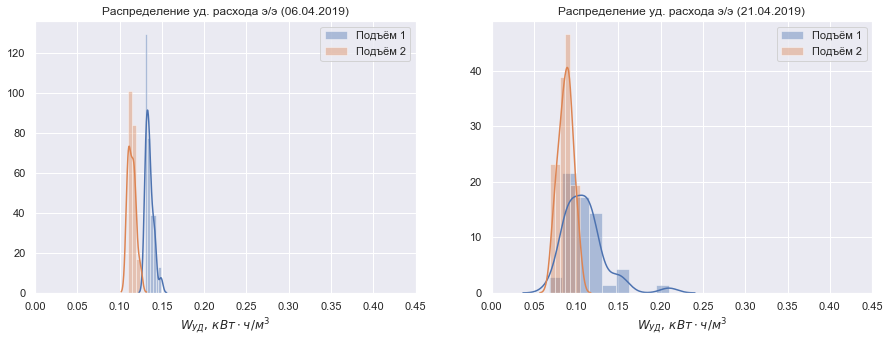

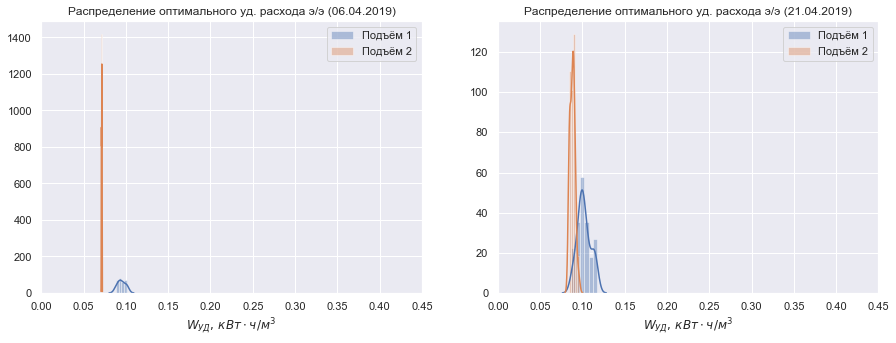

In [69]:
plot_dists(2, [log[:num], log[num:]], ['power rate lift 1', 'power rate lift 2'], lift_labels,
           ['Распределение уд. расхода э/э (06.04.2019)', 'Распределение уд. расхода э/э (21.04.2019)'], 
           '$W_{УД},\, кВт \cdot ч/м^3$', '', xlim=0.45)

plot_dists(2, [log[:num], log[num:]], ['power rate opt. lift 1', 'power rate opt. lift 2'], lift_labels, 
           ['Распределение оптимального уд. расхода э/э (06.04.2019)', 
            'Распределение оптимального уд. расхода э/э (21.04.2019)'], 
           '$W_{УД},\, кВт \cdot ч/м^3$', '', xlim=0.45)

##### Энергопотребление

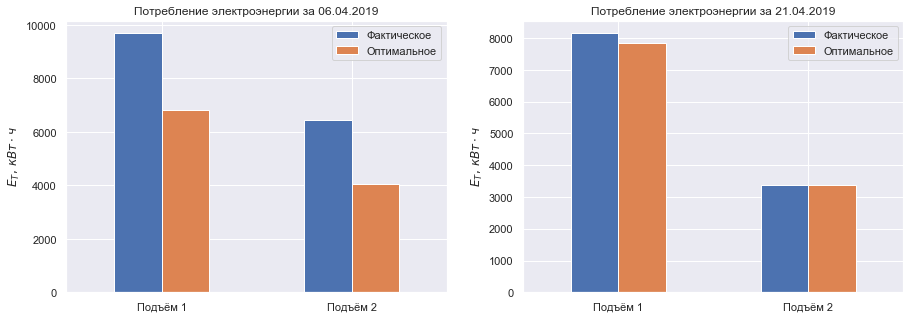

In [70]:
# потребление электроэнергии за рассматриваемый период

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

fact = [pb_1.energy_1, pb_2.energy_1, pb_1.energy_2, pb_2.energy_2]
opt = [pb_1.energy_opt_1, pb_2.energy_opt_1, pb_1.energy_opt_2, pb_2.energy_opt_2]

pd.DataFrame({'fact': fact[:2], 'opt': opt[:2]}, index=lift_labels).plot.bar(rot=0, ax=axes[0])
axes[0].legend(["Фактическое", "Оптимальное"])
axes[0].set_ylabel('$E_{T},\, кВт \cdot ч$')
axes[0].set_title('Потребление электроэнергии за 06.04.2019')

pd.DataFrame({'fact': fact[2:], 'opt': opt[2:]}, index=lift_labels).plot.bar(rot=0, ax=axes[1])
axes[1].legend(["Фактическое", "Оптимальное"])
axes[1].set_ylabel('$E_{T},\, кВт \cdot ч$')
axes[1].set_title('Потребление электроэнергии за 21.04.2019')

plt.show()